In [1]:
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_excel("cars.xlsx")
df.head()

,Numero,mpg,displacement,horsepower,weight,acceleration,origin
0,1,35,72,69,1613,18,japanese
1,2,31,76,52,1649,17,japanese
2,3,39,79,58,1755,17,japanese
3,4,35,81,60,1760,16,japanese
4,5,31,71,65,1773,19,japanese


In [3]:
df_new = df.drop(['origin'],axis = 1)
df_new = df_new.set_index("Numero")
print (df_new.columns)


Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')


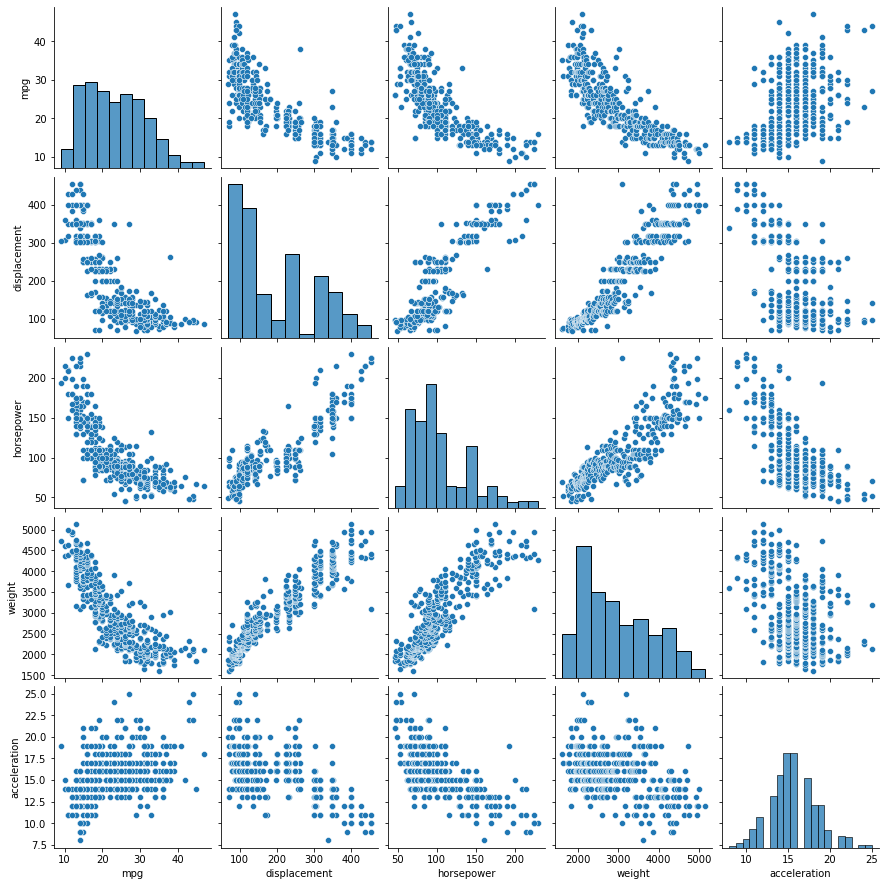

In [4]:
# Nuage par paire
import seaborn as sns
sns.pairplot(df_new)

In [5]:

# deuxième méthode de centrage réduction des données  
from sklearn import preprocessing
cars_cr = preprocessing.scale(df_new)


In [6]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

n_f = list(df_new.select_dtypes(include=['int64', 'float64']).columns)
numerical_features = n_f
numerical_features

scaler = MinMaxScaler()
# scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, numerical_features)])

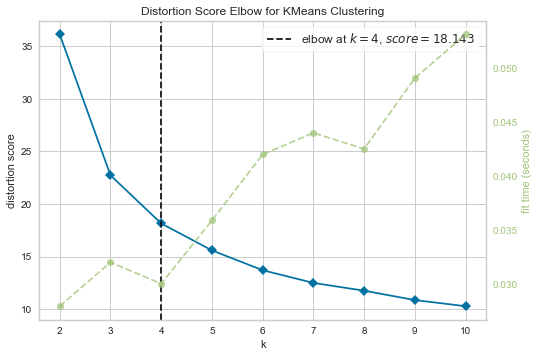

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
X = (df_new - df_new.mean(axis=0)) / df_new.std(axis=0)


# Elbow method
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor), 
    ("kelbowvisualizer", KElbowVisualizer(KMeans(), K=(4, 12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

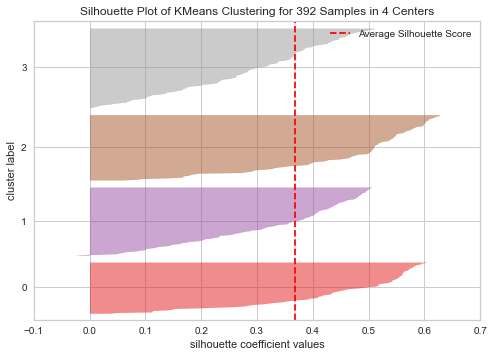

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 392 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
# Best K in Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

# Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

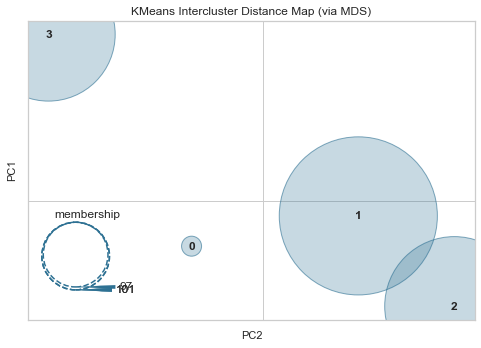

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [9]:
# Intercluster distance Map with best k
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

In [10]:
# K-means avec 4 groupes
from sklearn import cluster

res = cluster.KMeans(n_clusters=4)

In [11]:
res.fit(X)

KMeans(n_clusters=4)

In [12]:
res.predict(X)

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0,
       0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,

In [13]:
# num de cluster affectés aux groupes
res.labels_

array([3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0,
       0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3,
       0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3,
       1, 3, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,

In [14]:
# Éffectifs par groupe
import numpy
numpy.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([125,  97,  95,  75], dtype=int64))

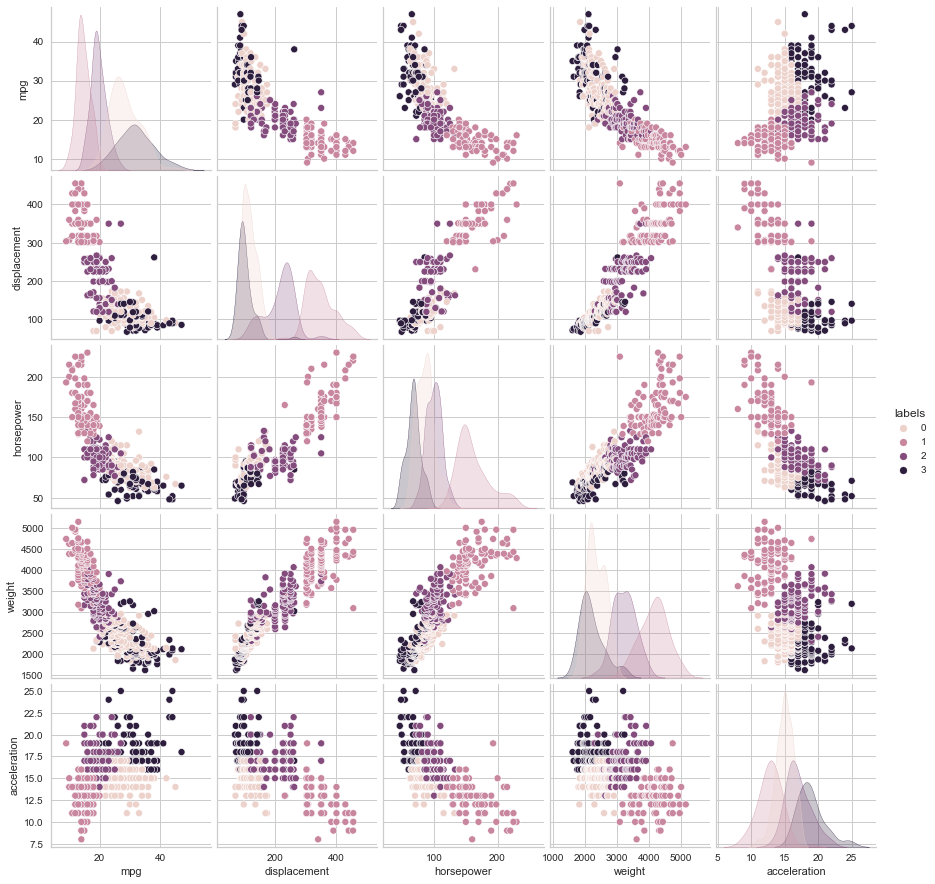

In [15]:
import seaborn as sns
# Rajouter la variable au data-frame initial
B = df_new
B['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(B,hue="labels")

In [16]:

from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(cars_cr, res.labels_)

1.02163520294274

## CAH 

In [17]:
#librairies pour la CAH
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [18]:
#générer la matrice des liens
Z = linkage(cars_cr,method='ward',metric='euclidean')

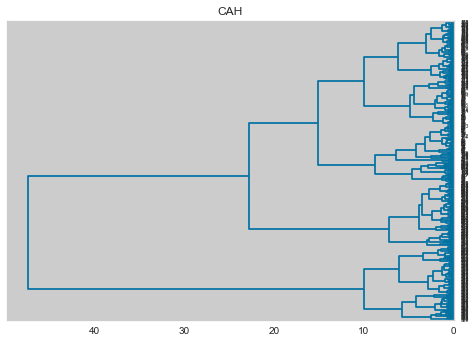

In [19]:
plt.title("CAH")
dendrogram(Z,labels=df_new.index,orientation='left',color_threshold=0)
plt.show()

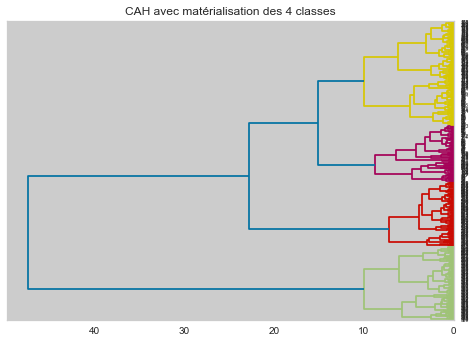

In [20]:
#matérialisation des 4 classes (hauteur t = 11)
#On choisi un niveau égale à 11 pour découper l'arbre 
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=df_new.index,orientation='left',color_threshold=11)
plt.show()

In [21]:
#découpage à la hauteur t = 11 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(Z,t=11,criterion='distance')
print(groupes_cah)

[3 3 4 3 3 3 3 4 3 4 3 3 3 3 4 4 3 4 4 4 4 4 4 3 3 3 3 4 4 4 3 3 4 3 4 3 4
 3 3 4 3 4 4 3 4 3 3 3 3 3 4 3 4 3 3 3 3 3 4 4 3 3 4 4 4 4 4 3 4 4 3 4 4 3
 4 3 4 4 3 4 4 4 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 4 4 4 4 4 4
 3 4 3 4 4 4 4 3 4 3 3 4 4 4 4 3 4 4 4 3 3 4 3 3 4 4 4 4 4 4 4 4 4 4 3 4 4
 4 3 4 4 4 4 4 4 4 4 2 3 4 4 3 4 4 3 2 4 3 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 3
 4 4 4 4 4 4 2 2 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 2 2 2 4 4 3 4 2 2
 3 2 2 3 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 3 1 3 2 1 2 2 2 3 2 2 3 2 2 3 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 1 2 1 1 2 2 1 2 2 3 2 1 1 2 2 1 2 2 2
 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Dans le cas de dimension très élevée on passe par une ACP ou ACM selon le type de données

In [22]:
# Reducing the dimensionality of the Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_principal = pca.fit_transform(cars_cr)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']



Temps total d'execution :  0.32370609999998123 




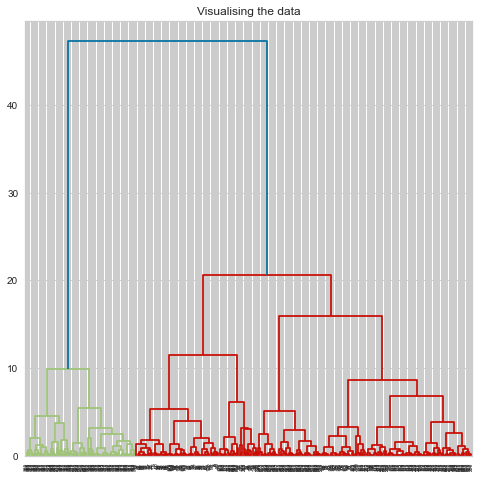

In [23]:
# Visualizing the working of the Dendograms
import time
import scipy.cluster.hierarchy as shc
 
time_start = time.perf_counter()

plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward')))

time_elapsed = (time.perf_counter() - time_start)

print("\n\nTemps total d'execution : ", time_elapsed, "\n\n")

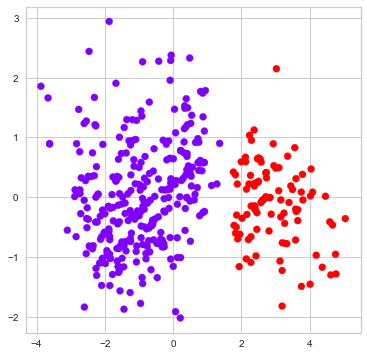

In [24]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters=2)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac2.fit_predict(X_principal), cmap='rainbow')
plt.show()

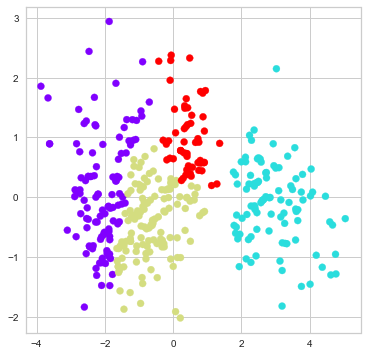

In [25]:
ac4 = AgglomerativeClustering(n_clusters=4)
  
# Visualizing the clustering
plt.figure(figsize=(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=ac4.fit_predict(X_principal), cmap='rainbow')
plt.show()